In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [4]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
len(gpus)

0

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data2'

In [8]:
os.listdir(data_dir)

['animal', 'human']

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in extension list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
data = tf.keras.utils.image_dataset_from_directory("data2")

Found 321 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

In [27]:
batch[0][0] #each picture representation of each pixel rgb

array([[[185.     , 184.     , 189.     ],
        [185.     , 184.     , 189.     ],
        [186.     , 185.     , 190.     ],
        ...,
        [212.39844, 212.26562, 218.26562],
        [212.     , 213.     , 218.     ],
        [212.     , 213.     , 218.     ]],

       [[187.61914, 186.61914, 191.61914],
        [187.61914, 186.61914, 191.61914],
        [188.61914, 187.61914, 192.61914],
        ...,
        [213.05777, 212.92496, 218.92496],
        [212.58203, 213.58203, 218.58203],
        [212.58203, 213.58203, 218.58203]],

       [[192.36523, 191.36523, 196.36523],
        [192.36523, 191.36523, 196.36523],
        [193.36523, 192.36523, 197.36523],
        ...,
        [214.25253, 214.11972, 220.11972],
        [213.63672, 214.63672, 219.63672],
        [213.63672, 214.63672, 219.63672]],

       ...,

       [[190.     , 189.     , 193.     ],
        [189.44377, 188.44377, 192.44377],
        [189.18164, 188.31445, 192.04883],
        ...,
        [243.71405, 243.71

In [34]:
print(batch)

(array([[[[ 34.966797 ,  89.9668   , 208.9668   ],
         [ 34.966797 ,  89.9668   , 208.9668   ],
         [ 34.966797 ,  89.9668   , 208.9668   ],
         ...,
         [ 73.023346 , 123.023346 , 210.02335  ],
         [ 73.0332   , 123.0332   , 210.0332   ],
         [ 73.0332   , 123.0332   , 210.0332   ]],

        [[ 34.       ,  89.       , 208.       ],
         [ 34.       ,  89.       , 208.       ],
         [ 34.       ,  89.       , 208.       ],
         ...,
         [ 73.832306 , 123.832306 , 210.8323   ],
         [ 74.14163  , 124.14163  , 211.14163  ],
         [ 74.19922  , 124.19922  , 211.19922  ]],

        [[ 33.833984 ,  88.833984 , 207.83398  ],
         [ 33.833984 ,  88.833984 , 207.83398  ],
         [ 33.833984 ,  88.833984 , 207.83398  ],
         ...,
         [ 75.282745 , 125.282745 , 212.28275  ],
         [ 75.68387  , 125.68387  , 212.68387  ],
         [ 76.166016 , 126.166016 , 213.16602  ]],

        ...,

        [[249.       , 166.       ,  

In [42]:
print(batch[1])

[0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1]


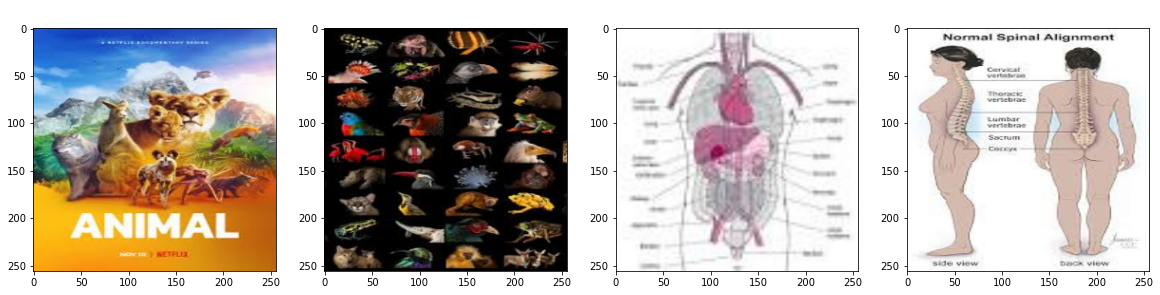

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_color("white")
  ax[idx].set_title(batch[1][idx], fontsize=20)

In [53]:
#O for animal, 1 for human

In [55]:
data = data.map(lambda image, label: (image / 255, label))

In [56]:
scaled_iterator = data.as_numpy_iterator()

In [57]:
batch = scaled_iterator.next()

In [58]:
batch[0].max(), batch[0].min()

(1.0, 0.0)

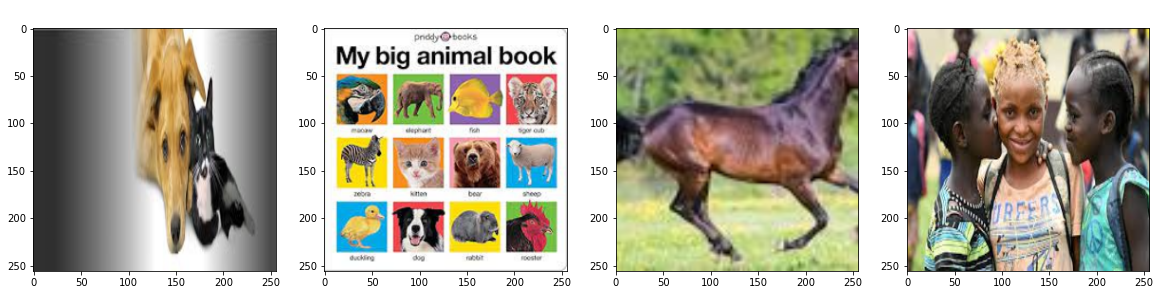

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_color("white")
  ax[idx].set_title(batch[1][idx], fontsize=20)

In [60]:
len(data)

11

In [63]:
train_size = int(len(data)* 0.7) + 1
val_size = int(len(data)* 0.2)
test_size = int(len(data)* 0.1)

In [64]:
train_size, val_size, test_size

(8, 2, 1)

In [67]:
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [66]:
data.take??

In [68]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [69]:
model = Sequential()

In [70]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [73]:
logdir = "logs2"

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 5s 539ms/step - loss: 0.9895 - accuracy: 0.4961 - val_loss: 0.6423 - val_accuracy: 0.5781
Epoch 2/20
8/8 [==============================] - 4s 487ms/step - loss: 0.5992 - accuracy: 0.7070 - val_loss: 0.6635 - val_accuracy: 0.5938
Epoch 3/20
8/8 [==============================] - 4s 495ms/step - loss: 0.5562 - accuracy: 0.7422 - val_loss: 0.5420 - val_accuracy: 0.7812
Epoch 4/20
8/8 [==============================] - 4s 560ms/step - loss: 0.4911 - accuracy: 0.7773 - val_loss: 0.4279 - val_accuracy: 0.7969
Epoch 5/20
8/8 [==============================] - 4s 522ms/step - loss: 0.4410 - accuracy: 0.7695 - val_loss: 0.4235 - val_accuracy: 0.7812
Epoch 6/20
8/8 [==============================] - 4s 482ms/step - loss: 0.4146 - accuracy: 0.8164 - val_loss: 0.4267 - val_accuracy: 0.8125
Epoch 7/20
8/8 [==============================] - 4s 509ms/step - loss: 0.3326 - accuracy: 0.8672 - val_loss: 0.3140 - val_accuracy: 0.8594
Epoch 8/20
8/8 [====

In [76]:
hist.history

{'loss': [0.9894990921020508,
  0.599220871925354,
  0.5562158823013306,
  0.4911389648914337,
  0.44104355573654175,
  0.414554238319397,
  0.3326261341571808,
  0.3004435896873474,
  0.26641762256622314,
  0.2491135597229004,
  0.18162360787391663,
  0.2010042816400528,
  0.1676149219274521,
  0.22783972322940826,
  0.16990722715854645,
  0.10960448533296585,
  0.08351154625415802,
  0.10352062433958054,
  0.07180102169513702,
  0.07464302331209183],
 'accuracy': [0.49609375,
  0.70703125,
  0.7421875,
  0.77734375,
  0.76953125,
  0.81640625,
  0.8671875,
  0.890625,
  0.89453125,
  0.9140625,
  0.953125,
  0.921875,
  0.93359375,
  0.8984375,
  0.9453125,
  0.96875,
  0.9765625,
  0.96484375,
  0.984375,
  0.984375],
 'val_loss': [0.6422585248947144,
  0.6634683609008789,
  0.541985273361206,
  0.4279012680053711,
  0.42354485392570496,
  0.4267124533653259,
  0.313987672328949,
  0.1791027933359146,
  0.23747915029525757,
  0.2728726267814636,
  0.13388901948928833,
  0.2755442857

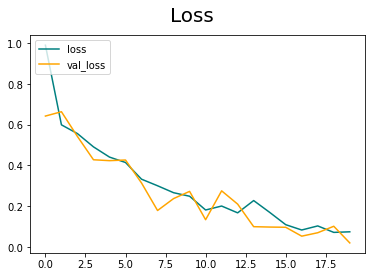

In [77]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc="upper left")
plt.suptitle("Loss", fontsize=20)
plt.show()

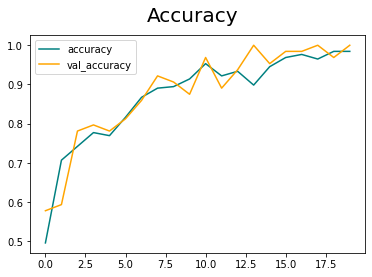

In [78]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.legend(loc="upper left")
plt.suptitle("Accuracy", fontsize=20)
plt.show()

In [79]:
from keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator():
  Images, label = batch
  label_hat = model.predict(Images)
  precision.update_state(label, label_hat)
  recall.update_state(label, label_hat)
  accuracy.update_state(label, label_hat)

1/1 [==============================] - 0s 88ms/step


In [81]:
print(f"Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


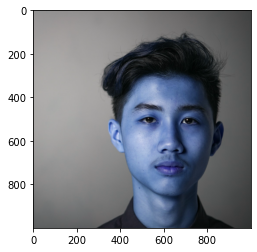

In [83]:
img = cv2.imread('humantest.jpg')
plt.imshow(img.astype(int))
plt.show()

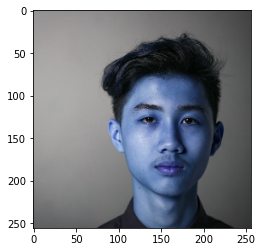

In [84]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [85]:
np.expand_dims(resize, 0)

array([[[[148.      , 146.      , 146.      ],
         [148.      , 146.      , 146.      ],
         [147.45312 , 145.45312 , 145.45312 ],
         ...,
         [ 64.      ,  66.      ,  66.      ],
         [ 64.      ,  66.      ,  66.      ],
         [ 63.      ,  65.      ,  65.      ]],

        [[148.      , 146.      , 146.      ],
         [148.      , 146.      , 146.      ],
         [148.      , 146.      , 146.      ],
         ...,
         [ 65.      ,  67.      ,  67.      ],
         [ 65.      ,  67.      ,  67.      ],
         [ 64.      ,  66.      ,  66.      ]],

        [[148.      , 146.      , 146.      ],
         [149.      , 147.      , 147.      ],
         [149.      , 147.      , 147.      ],
         ...,
         [ 65.      ,  67.      ,  67.      ],
         [ 64.      ,  66.      ,  66.      ],
         [ 64.      ,  66.      ,  66.      ]],

        ...,

        [[ 95.      ,  96.453125,  99.09375 ],
         [ 95.      ,  97.      ,  98.      ]

In [86]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [87]:
if yhat > 0.5:
  print("Predicted class is Human")
else:
  print("Predicted class is Animal")

Predicted class is Human


In [89]:
print(yhat)

[[0.94908917]]


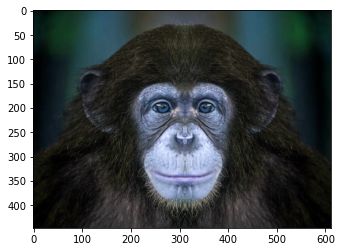

In [95]:
img2 = cv2.imread('animaltest.jpeg')
plt.imshow(img2)
plt.show()

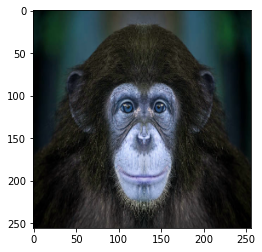

In [97]:
resize = tf.image.resize(img2, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
yhat2 = model.predict(np.expand_dims(resize/255, 0)) #Require batch of images, not just one

1/1 [==============================] - 0s 23ms/step


In [99]:
if yhat2 > 0.5:
  print("Predicted class is Human")
else:
  print("Predicted class is Animal")

Predicted class is Human


In [100]:
print(yhat2)

[[0.66898936]]
